# Credit Risk Management
* Data Understanding : Memahami data dari segi struktur data, jumlah kolom dan baris, melihat distribusi awal variable statistik deskriptif dan plotumun data
* EDA : Membuat visualaisasi sederhana untuk melihat hubungan atau korelasi setiap fitur dan vairabel
* Data Preparation : Mengatasi nilai yang hilang dan outlier pada data, serta melakukan encoding dan normalisasi pada setiap variable yang dibutuhkan 
* Data Modeling : Membuat model machine learning dan mealtih model dengan data training dan mengujinya dengan data testing, serta melakukan evaluasi  model dengan metrik yang relevan
* Evaluation : Melakukan evaluasi kinerja pada model yang digunakan
* Hyperparameter Tunning : menghasilkan model optimal yang meminimalkan fungsi kerugian pada melakukan permodelan

## Data Understanding

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_row', None)
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('loan_data_2007_2014.csv')
data.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
data.shape

(466285, 75)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

Total kolom pada dataset adalah 75 dan 466285 total baris, terdapat 3 jenis tipe data pada dataset yakni `float64 = 46`, `int64 = 7`, dan `object = 22`.

In [5]:
data.describe()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,466285.000000,4.662850e+05,4.662850e+05,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,4.662810e+05,466285.000000,466256.000000,466256.000000,215934.000000,62638.000000,466256.000000,466256.000000,4.662850e+05,465945.000000,466256.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466140.000000,98974.000000,466285.0,0.0,0.0,0.0,466256.000000,3.960090e+05,3.960090e+05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.960090e+05,0.0,0.0,0.0
mean,233142.000000,1.307973e+07,1.459766e+07,14317.277577,14291.801044,14222.329888,13.829236,432.061201,7.327738e+04,17.218758,0.284678,0.804745,34.104430,74.306012,11.187069,0.160564,1.623020e+04,56.176947,25.064430,4410.062342,4408.452258,11540.686220,11469.892747,8866.014657,2588.677225,0.650129,85.344211,8.961534,3123.913796,0.009085,42.852547,1.0,NaN,NaN,NaN,0.004002,1.919135e+02,1.388017e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.037909e+04,NaN,NaN,NaN
std,134605.029472,1.089371e+07,1.168237e+07,8286.509164,8274.371300,8297.637788,4.357587,243.485550,5.496357e+04,7.851121,0.797365,1.091598,21.778487,30.357653,4.987526,0.510863,2.067625e+04,23.732628,11.600141,6355.078769,6353.198001,8265.627112,8254.157579,7031.687997,2483.809661,5.265730,552.216084,85.491437,5554.737393,0.108648,21.662591,0.0,NaN,NaN,NaN,0.068637,1.463021e+04,1.521147e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.724713e+04,NaN,NaN,NaN
min,0.000000,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,5.420000,15.670000,1.896000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,NaN,NaN,NaN,0.000000,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN
25%,116571.000000,3.639987e+06,4.379705e+06,8000.000000,8000.000000,8000.000000,10.990000,256.690000,4.500000e+04,11.360000,0.000000,0.000000,16.000000,53.000000,8.000000,0.000000,6.413000e+03,39.200000,17.000000,0.000000,0.000000,5552.125349,5499.250000,3708.560000,957.280000,0.000000,0.000000,0.000000,312.620000,0.000000,26.000000,1.0,NaN,NaN,NaN,0.000000,0.000000e+00,2.861800e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.350000e+04,NaN,NaN,NaN
50%,233142.000000,1.010790e+07,1.194108e+07,12000.000000,12000.000000,12000.000000,13.660000,379.890000,6.300000e+04,16.870000,0.000000,0.000000,31.000000,76.000000,10.000000,0.000000,1.176400e+04,57.600000,23.000000,441.470000,441.380000,9419.250943,9355.430000,6817.760000,1818.880000,0.000000,0.000000,0.000000,545.960000,0.000000,42.000000,1.0,NaN,NaN,NaN,0.000000,0.000000e+00,8.153900e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.280000e+04,NaN,NaN,NaN
75%,349713.000000,2.073121e+07,2.300154e+07,20000.000000,20000.000000,19950.000000,16.490000,566.580000,8.896000e+04,22.780000,0.000000,1.000000,49.000000,102.000000,14.000000,0.000000,2.033300e+04,74.700000,32.000000,7341.650000,7338.390000,15308.158460,15231.310000,12000.000000,3304.530000,0.000000,0.000000,0.000000,3187.510000,0.000000,59.000000,1.0,NaN,NaN,NaN,0.000000,0.000000e+00,2.089530e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

## Data Preparation

### Feature Selection

Membuang fitur yang punya nilai unik 1 dan yang sangat banyak nilainya, serta fitur yang nilai uniknya sangat tidak seimbang

In [6]:
data.nunique()

Unnamed: 0                     466285
id                             466285
member_id                      466285
loan_amnt                        1352
funded_amnt                      1354
funded_amnt_inv                  9854
term                                2
int_rate                          506
installment                     55622
grade                               7
sub_grade                          35
emp_title                      205475
emp_length                         11
home_ownership                      6
annual_inc                      31901
verification_status                 3
issue_d                            91
loan_status                         9
pymnt_plan                          2
url                            466285
desc                           124436
purpose                            14
title                           63099
zip_code                          888
addr_state                         50
dti                              3997
delinq_2yrs 

In [7]:
data.drop(['Unnamed: 0','policy_code','application_type'
           ,'emp_title','title','url','pymnt_plan'], axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 68 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           466285 non-null  int64  
 1   member_id                    466285 non-null  int64  
 2   loan_amnt                    466285 non-null  int64  
 3   funded_amnt                  466285 non-null  int64  
 4   funded_amnt_inv              466285 non-null  float64
 5   term                         466285 non-null  object 
 6   int_rate                     466285 non-null  float64
 7   installment                  466285 non-null  float64
 8   grade                        466285 non-null  object 
 9   sub_grade                    466285 non-null  object 
 10  emp_length                   445277 non-null  object 
 11  home_ownership               466285 non-null  object 
 12  annual_inc                   466281 non-null  float64
 13 

    Membuang fitur yang tidak dibutuhkan dan dapat beresiko mengganggu ketika melakukan permodelan

In [8]:
data.drop(['issue_d', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 
           'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'sub_grade',
           'last_credit_pull_d','zip_code','next_pymnt_d','earliest_cr_line','member_id'],axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 54 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           466285 non-null  int64  
 1   loan_amnt                    466285 non-null  int64  
 2   funded_amnt                  466285 non-null  int64  
 3   funded_amnt_inv              466285 non-null  float64
 4   term                         466285 non-null  object 
 5   int_rate                     466285 non-null  float64
 6   installment                  466285 non-null  float64
 7   grade                        466285 non-null  object 
 8   emp_length                   445277 non-null  object 
 9   home_ownership               466285 non-null  object 
 10  annual_inc                   466281 non-null  float64
 11  verification_status          466285 non-null  object 
 12  loan_status                  466285 non-null  object 
 13 

### Missing value and cuplication handling

In [9]:
data.duplicated().sum()

0

Tidak ada duplikasi data pada dataset ini

In [10]:
data_null = data.isnull().sum().reset_index()
data_null.columns = ["kolom", "jumlah_hilang"]
data_null['Persen'] = (data_null["jumlah_hilang"]/data.shape[0])*100
data_null.sort_values(by=['Persen'], ascending = False).reset_index()

,index,kolom,jumlah_hilang,Persen
0,53,inq_last_12m,466285,100.000000
1,45,il_util,466285,100.000000
2,35,verification_status_joint,466285,100.000000
3,39,open_acc_6m,466285,100.000000
4,40,open_il_6m,466285,100.000000
5,34,dti_joint,466285,100.000000
6,41,open_il_12m,466285,100.000000
7,42,open_il_24m,466285,100.000000
8,43,mths_since_rcnt_il,466285,100.000000
9,44,total_bal_il,466285,100.000000


In [11]:
drop = data_null[data_null['Persen']>50]['kolom']
print(drop)
print(len(drop))

13                           desc
19         mths_since_last_delinq
20         mths_since_last_record
32    mths_since_last_major_derog
33               annual_inc_joint
34                      dti_joint
35      verification_status_joint
39                    open_acc_6m
40                     open_il_6m
41                    open_il_12m
42                    open_il_24m
43             mths_since_rcnt_il
44                   total_bal_il
45                        il_util
46                    open_rv_12m
47                    open_rv_24m
48                     max_bal_bc
49                       all_util
51                         inq_fi
52                    total_cu_tl
53                   inq_last_12m
Name: kolom, dtype: object
21


Terdapat 21 kolom yang nilai missing valuenya lebih dari 50%, oleh karena itu akan kita drop kolom tersebut

In [12]:
data.drop(drop, axis=1, inplace=True)

### Filling the Missing Value 

In [13]:
data.isnull().sum()

id                                0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
emp_length                    21008
home_ownership                    0
annual_inc                        4
verification_status               0
loan_status                       0
purpose                           0
addr_state                        0
dti                               0
delinq_2yrs                      29
inq_last_6mths                   29
open_acc                         29
pub_rec                          29
revol_bal                         0
revol_util                      340
total_acc                        29
initial_list_status               0
out_prncp                         0
out_prncp_inv                     0
total_pymnt                       0
last_pymnt_amnt             

Mengisi missing value pada kolom yang bertipe data numerikal dengan nilai mean /rata rata

In [14]:
for col in data.select_dtypes(exclude='object'):
    data[col] = data[col].fillna(data[col].mean())

In [15]:
data.isnull().sum()

id                                0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
emp_length                    21008
home_ownership                    0
annual_inc                        0
verification_status               0
loan_status                       0
purpose                           0
addr_state                        0
dti                               0
delinq_2yrs                       0
inq_last_6mths                    0
open_acc                          0
pub_rec                           0
revol_bal                         0
revol_util                        0
total_acc                         0
initial_list_status               0
out_prncp                         0
out_prncp_inv                     0
total_pymnt                       0
last_pymnt_amnt             

Mengisi missing value pada kolom yang bertipe data objek dengan mode

In [16]:
data['emp_length'].value_counts()

10+ years    150049
2 years       41373
3 years       36596
< 1 year      36265
5 years       30774
1 year        29622
4 years       28023
7 years       26180
6 years       26112
8 years       22395
9 years       17888
Name: emp_length, dtype: int64

In [17]:
data['emp_length'] = data['emp_length'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)
mode_emp = data['emp_length'].mode()[0]
data['emp_length'] = data['emp_length'].fillna(mode_emp)
data['emp_length'].isnull().sum()

0

In [18]:
data['emp_length'].value_counts()

10.0    171057
1.0      65887
2.0      41373
3.0      36596
5.0      30774
4.0      28023
7.0      26180
6.0      26112
8.0      22395
9.0      17888
Name: emp_length, dtype: int64

In [19]:
data.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,1077501,5000,5000,4975.0,36 months,10.65,162.87,B,10.0,RENT,24000.0,Verified,Fully Paid,credit_card,AZ,27.65,0.0,1.0,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,171.62,0.0,0.0,191.913517,138801.713385,30379.087771
1,1077430,2500,2500,2500.0,60 months,15.27,59.83,C,1.0,RENT,30000.0,Source Verified,Charged Off,car,GA,1.00,0.0,5.0,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,119.66,0.0,0.0,191.913517,138801.713385,30379.087771
2,1077175,2400,2400,2400.0,36 months,15.96,84.33,C,10.0,RENT,12252.0,Not Verified,Fully Paid,small_business,IL,8.72,0.0,2.0,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,649.91,0.0,0.0,191.913517,138801.713385,30379.087771
3,1076863,10000,10000,10000.0,36 months,13.49,339.31,C,10.0,RENT,49200.0,Source Verified,Fully Paid,other,CA,20.00,0.0,1.0,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,357.48,0.0,0.0,191.913517,138801.713385,30379.087771
4,1075358,3000,3000,3000.0,60 months,12.69,67.79,B,1.0,RENT,80000.0,Source Verified,Current,other,OR,17.94,0.0,0.0,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,67.79,0.0,0.0,191.913517,138801.713385,30379.087771


In [20]:
data.isnull().sum()

id                            0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
loan_status                   0
purpose                       0
addr_state                    0
dti                           0
delinq_2yrs                   0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
initial_list_status           0
out_prncp                     0
out_prncp_inv                 0
total_pymnt                   0
last_pymnt_amnt               0
collections_12_mths_ex_med    0
acc_now_delinq                0
tot_coll_amt                  0
tot_cur_

### Melihat Outliers 

Melihat outliers pada data bertipe numerical

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 33 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   id                          466285 non-null  int64  
 1   loan_amnt                   466285 non-null  int64  
 2   funded_amnt                 466285 non-null  int64  
 3   funded_amnt_inv             466285 non-null  float64
 4   term                        466285 non-null  object 
 5   int_rate                    466285 non-null  float64
 6   installment                 466285 non-null  float64
 7   grade                       466285 non-null  object 
 8   emp_length                  466285 non-null  float64
 9   home_ownership              466285 non-null  object 
 10  annual_inc                  466285 non-null  float64
 11  verification_status         466285 non-null  object 
 12  loan_status                 466285 non-null  object 
 13  purpose       

In [21]:
no_use = ['id']
out_dis = data.select_dtypes(exclude=[np.object_])
out_dis = out_dis[out_dis.columns[~out_dis.columns.isin(no_use)]]

In [22]:
out_dis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 24 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_amnt                   466285 non-null  int64  
 1   funded_amnt                 466285 non-null  int64  
 2   funded_amnt_inv             466285 non-null  float64
 3   int_rate                    466285 non-null  float64
 4   installment                 466285 non-null  float64
 5   emp_length                  466285 non-null  float64
 6   annual_inc                  466285 non-null  float64
 7   dti                         466285 non-null  float64
 8   delinq_2yrs                 466285 non-null  float64
 9   inq_last_6mths              466285 non-null  float64
 10  open_acc                    466285 non-null  float64
 11  pub_rec                     466285 non-null  float64
 12  revol_bal                   466285 non-null  int64  
 13  revol_util    

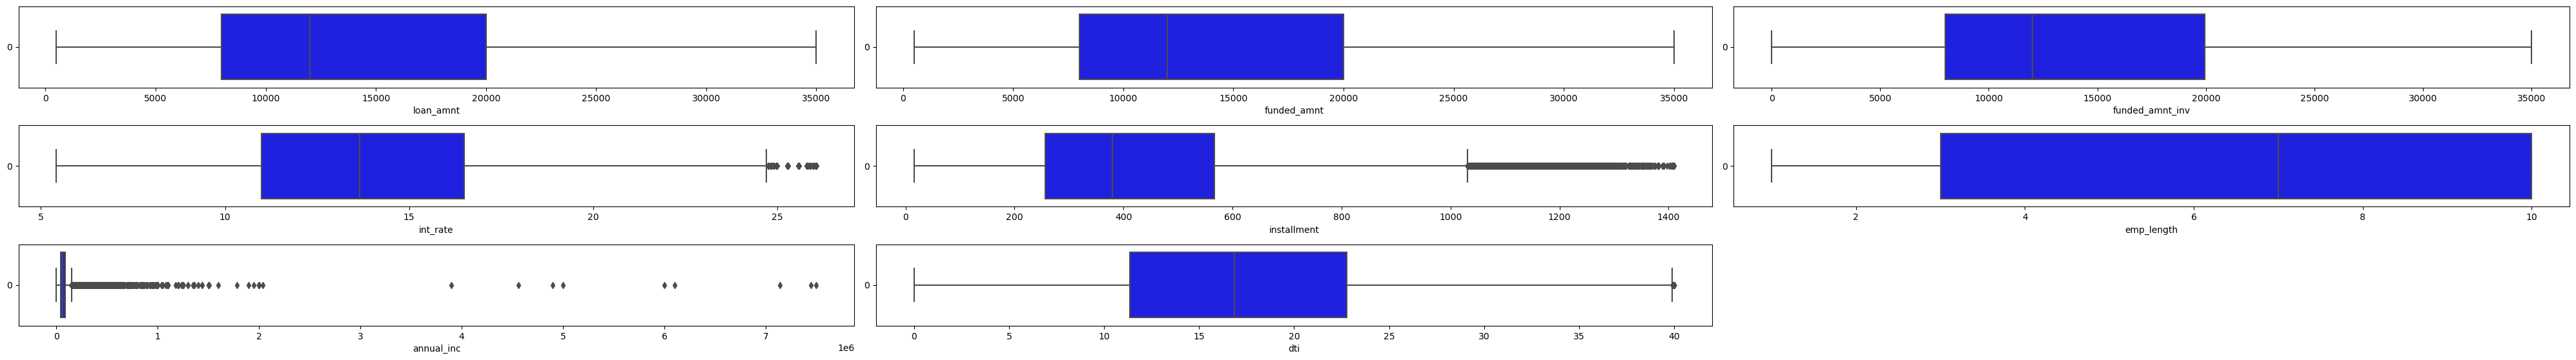

In [23]:
plt.figure(figsize=(40, 20))
for i in range(0, 8):
    plt.subplot(11, 3, i+1)
    sns.boxplot(out_dis.iloc[:,i], color='blue',orient='h')
    plt.xlabel(out_dis.columns[i])  
    plt.tight_layout()

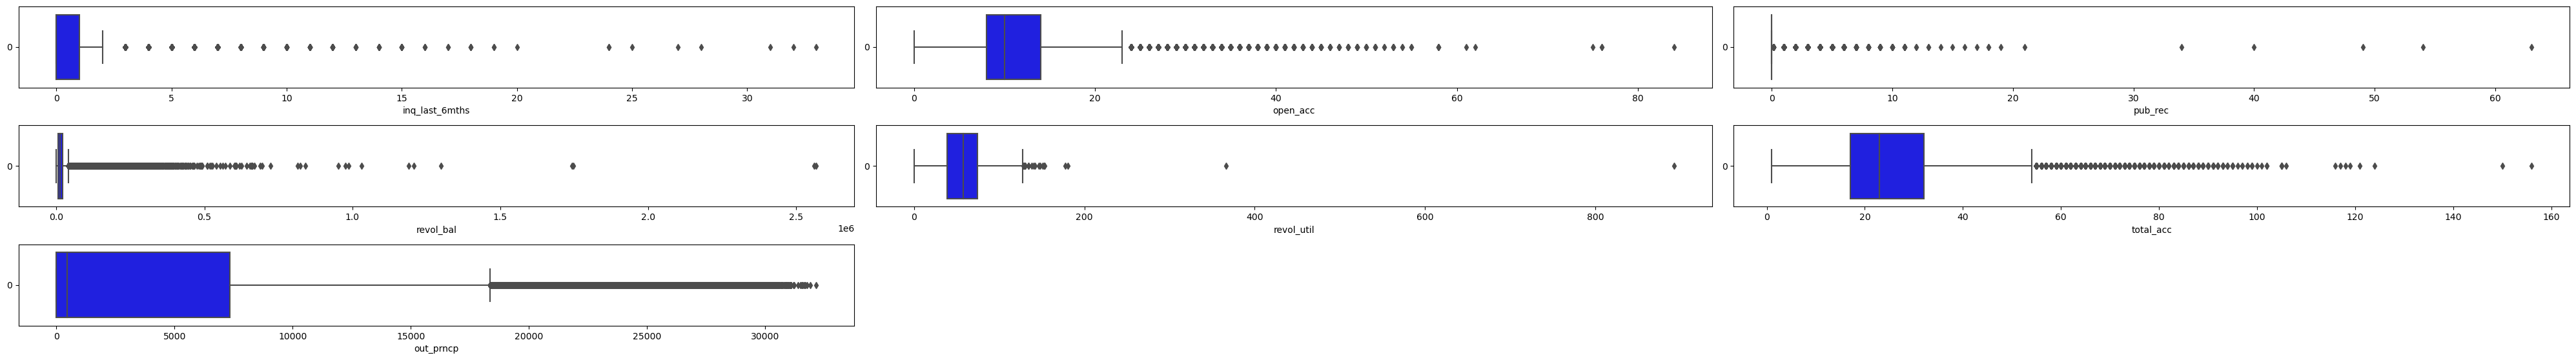

In [24]:
plt.figure(figsize=(40, 20))
for i in range(9, 16):
    plt.subplot(11, 3, i+1)
    sns.boxplot(out_dis.iloc[:,i], color='blue',orient='h')
    plt.xlabel(out_dis.columns[i])  
    plt.tight_layout()

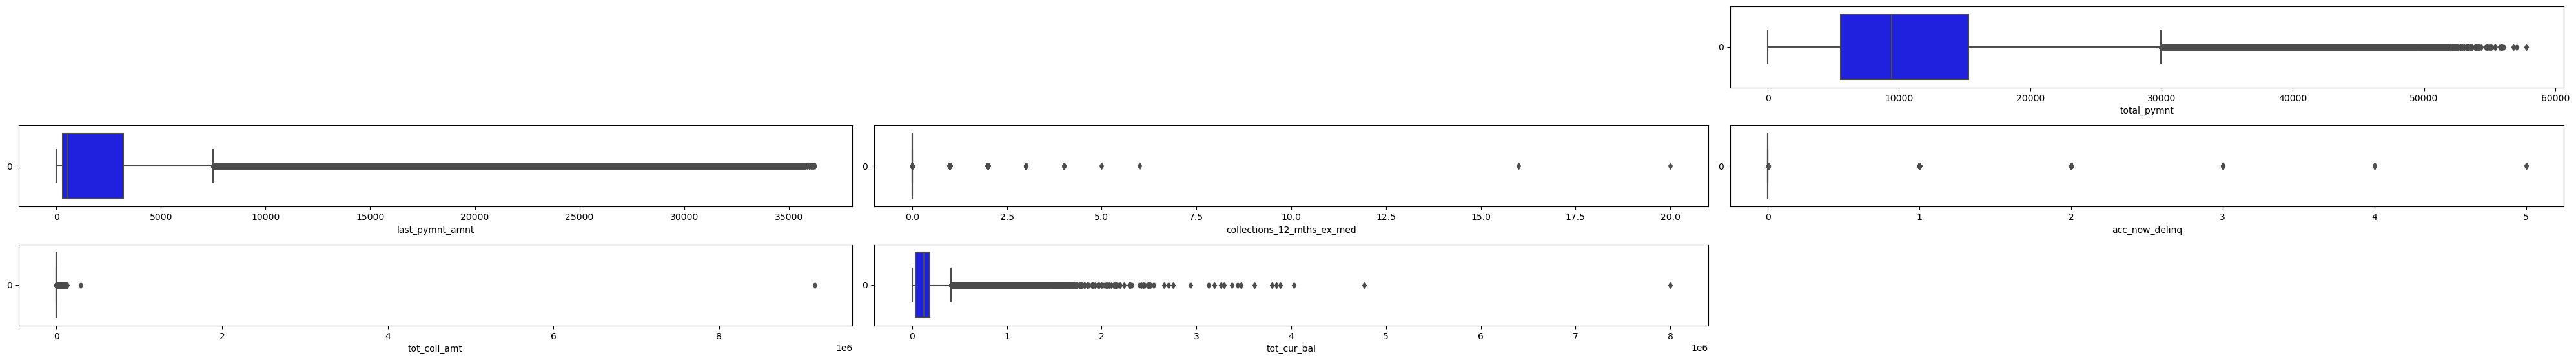

In [25]:
plt.figure(figsize=(40, 20))
for i in range(17, 23):
    plt.subplot(11, 3, i+1)
    sns.boxplot(out_dis.iloc[:,i], color='blue',orient='h')
    plt.xlabel(out_dis.columns[i])  
    plt.tight_layout()

Berdasarkan box plot diatas hampir semua fitur memiliki outlier yang sangat banyak, hanya ada beberapa fitur yang outliernya bersih dan sedikit, yakni fitur loan_amnt, funded_amnt, funded_amnt_inv, int_rate, dan dti. Sisanya fitur yang lain mempunyai outlier yang sangat banyak.

## EDA

Melihat sebaran alasan penggunan menagajukan peminjaman

In [26]:
data['purpose'].unique()

array(['credit_card', 'car', 'small_business', 'other', 'wedding',
       'debt_consolidation', 'home_improvement', 'major_purchase',
       'medical', 'moving', 'vacation', 'house', 'renewable_energy',
       'educational'], dtype=object)

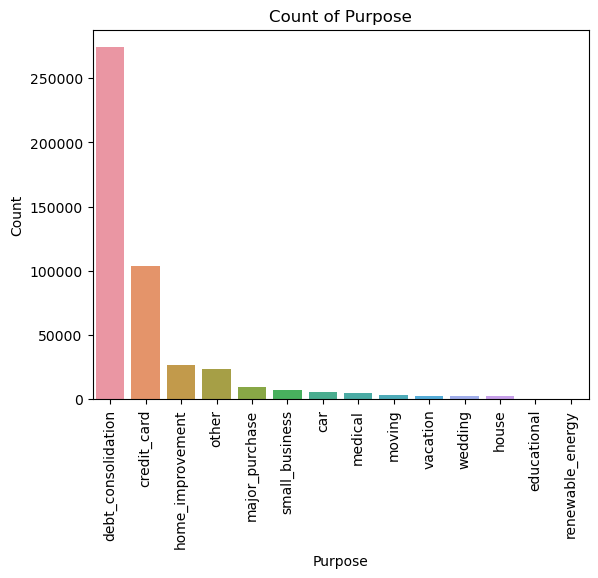

In [27]:
alasan = data['purpose'].value_counts()

sns.barplot(x=alasan.index, y=alasan.values)
plt.xlabel('Purpose')
plt.ylabel('Count')
plt.title('Count of Purpose')
plt.xticks(rotation=90)
plt.show()

Membayar hutang menjadi alasan terbanyak nasabah untuk melakukan pinjaman, setelah itu kartu kredit dan renovasi rumah menjadi alasan lainnya

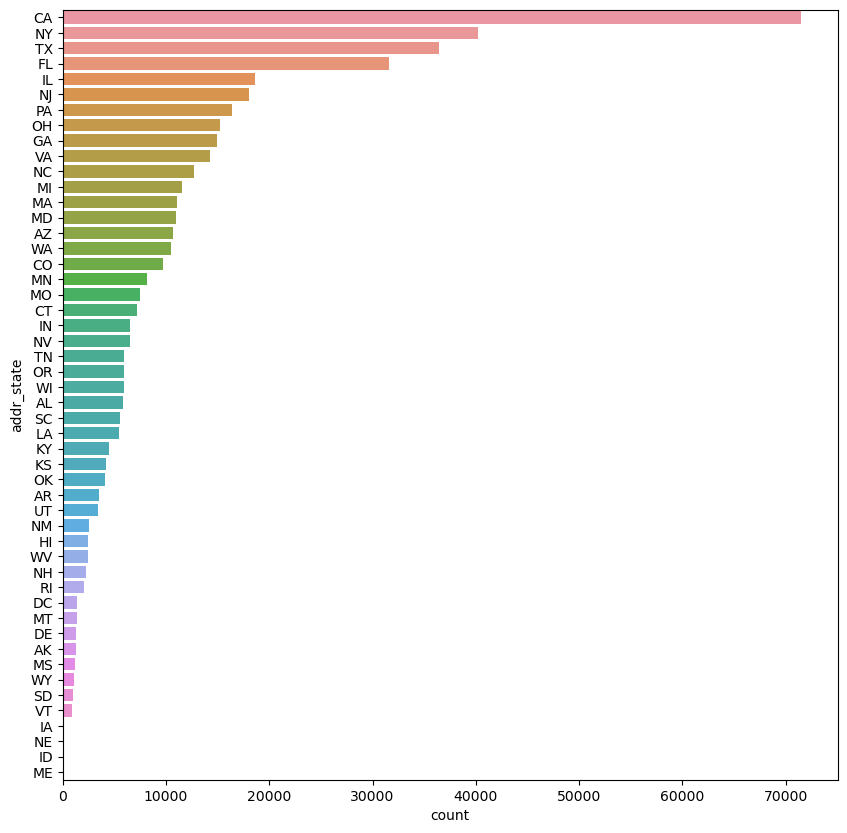

In [28]:
value = data["addr_state"].value_counts()

plt.figure(figsize=(10,10))
sns.countplot(y= "addr_state",order=value.index, data = data)
plt.show()

Daerah dengan kode CA, NY, TX, dan FL adalah sebaran daerah peminjam terbanyak

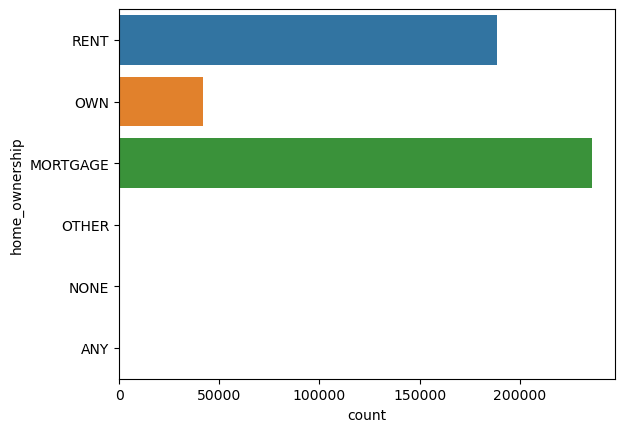

MORTGAGE    50.59%
RENT        40.42%
OWN          8.94%
OTHER        0.04%
NONE         0.01%
ANY          0.00%
Name: home_ownership, dtype: object


In [29]:
sns.countplot(y= "home_ownership", data = data)
plt.show()

count = data['home_ownership'].value_counts()
percentage =  count/ count.sum()
percentage = percentage.apply("{:.2%}".format)
print(percentage)

50% peminjam merupakan hipotek dan 40% peminjam menyewa tempat tinggal 

## Correlation Analysis

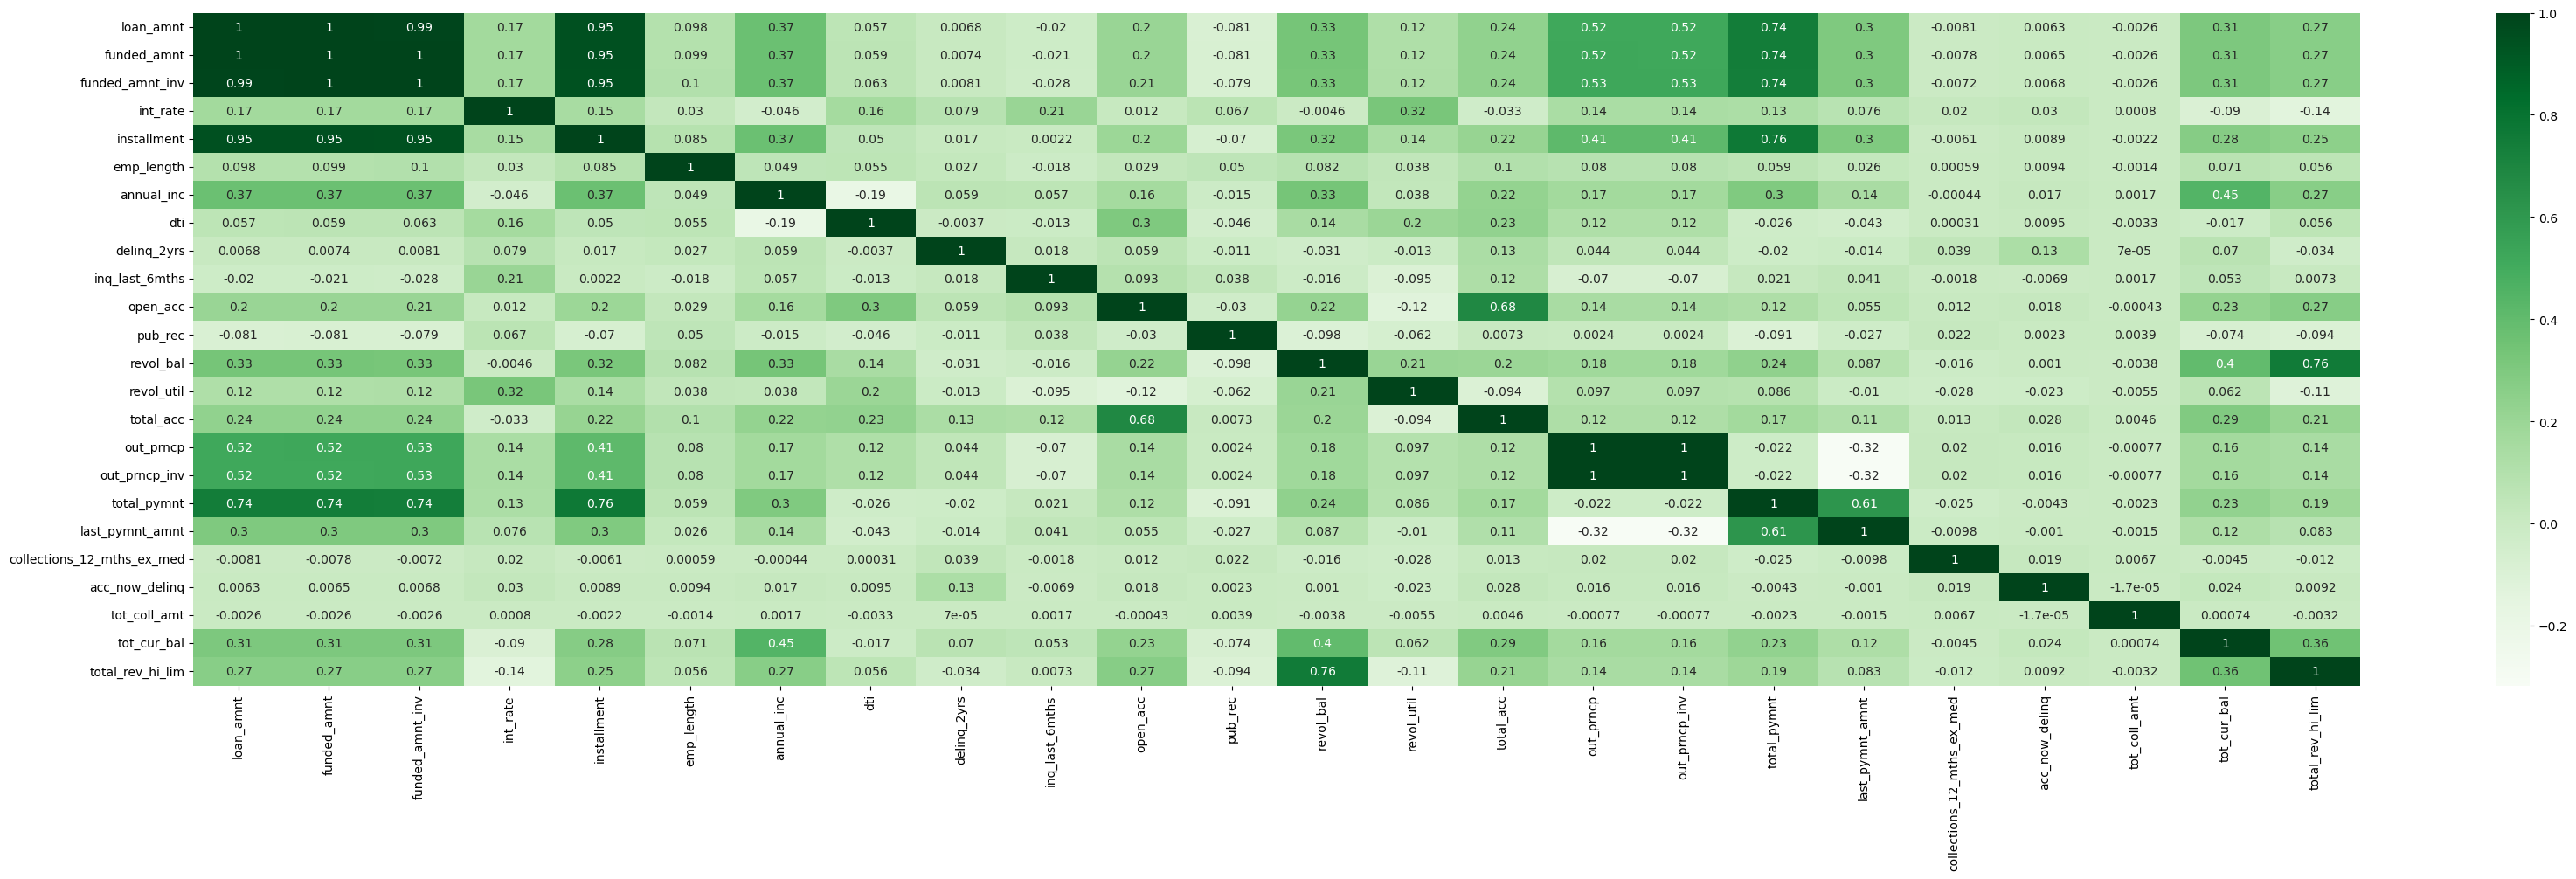

In [30]:
no_use = ['id']
out_dis = data.select_dtypes(exclude=[np.object_])
out_dis = out_dis[out_dis.columns[~out_dis.columns.isin(no_use)]]
fig = plt.figure(figsize = (40,10))
sns.heatmap(out_dis.corr(),cmap='Greens', annot = True);

### Variabel targeting

Menjadikan label loan_status untuk variabel target, serta melakukan mapping menjadi 2 status yaitu good loan yang bernilai 1 dan bad loan yang bernilai 0

In [31]:
data['loan_status'].value_counts()

Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

In [32]:
mapping = {
    'Fully Paid': 1,
    'Does not meet the credit policy. Status:Fully Paid': 1,
    'Charged Off': 0,
    'Does not meet the credit policy. Status:Charged Off': 0,
    'Default': 0,
    'Late (31-120 days)': 0
}

# Mengganti nilai-nilai unik sesuai dengan mapping
data['loan_status'] = data['loan_status'].replace(mapping)

# Menghapus baris yang memiliki nilai unik selain yang telah ditentukan
data = data[data['loan_status'].isin([0, 1])]

# Menampilkan hasil
print(data['loan_status'].value_counts())

1    186727
0     50968
Name: loan_status, dtype: int64


In [33]:
data.shape

(237695, 33)

## encode categorical

melakukan encofing untuk fitur categorical

In [34]:
data.select_dtypes(include ='object').head()

,term,grade,home_ownership,verification_status,loan_status,purpose,addr_state,initial_list_status
0,36 months,B,RENT,Verified,1,credit_card,AZ,f
1,60 months,C,RENT,Source Verified,0,car,GA,f
2,36 months,C,RENT,Not Verified,1,small_business,IL,f
3,36 months,C,RENT,Source Verified,1,other,CA,f
5,36 months,A,RENT,Source Verified,1,wedding,AZ,f


In [35]:
data['term'] = data['term'].str.replace(' months', '').astype(int)

In [36]:
data['term'].value_counts()

36    185700
60     51995
Name: term, dtype: int64

In [37]:
new_grade = {'A' : 1,'B' : 2,'C' : 3,'D' : 4,'E' : 5,'F' : 6,'G' : 7}
data['grade'] = data['grade'].map(new_grade)
data['grade'].value_counts()

2    71990
3    60683
1    39442
4    38431
5    17911
6     7273
7     1965
Name: grade, dtype: int64

In [38]:
data.select_dtypes(include ='object').head()

,home_ownership,verification_status,loan_status,purpose,addr_state,initial_list_status
0,RENT,Verified,1,credit_card,AZ,f
1,RENT,Source Verified,0,car,GA,f
2,RENT,Not Verified,1,small_business,IL,f
3,RENT,Source Verified,1,other,CA,f
5,RENT,Source Verified,1,wedding,AZ,f


In [39]:
##Mengubah 'initial_list_status'
init_new = {'f' : 1, 'w' : 0}
data['initial_list_status'] = data['initial_list_status'].map(init_new)
data['initial_list_status'].value_counts()

1    177046
0     60649
Name: initial_list_status, dtype: int64

In [40]:
target_dict = {'MORTGAGE':'MORTGAGE',
               'RENT':'RENT',
               'OWN':'OWN',
               'OTHER':'OTHER',
               'ANY':'OTHER',
               'NONE':'OTHER'}
# Create the mapped values in a new column
data["home_ownership"] = data["home_ownership"].map(target_dict)

In [41]:
#One hot encoding
onehot = ['verification_status', 'purpose', 'addr_state','home_ownership']

cat_onehot = pd.get_dummies(data[onehot])

In [42]:
cat_onehot.head()

,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,addr_state_AK,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,addr_state_DC,addr_state_DE,addr_state_FL,addr_state_GA,addr_state_HI,addr_state_IA,addr_state_ID,addr_state_IL,addr_state_IN,addr_state_KS,addr_state_KY,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_ME,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_MS,addr_state_MT,addr_state_NC,addr_state_NE,addr_state_NH,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,home_ownership_MORTGAGE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT
0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [43]:
cat_onehot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 237695 entries, 0 to 466283
Data columns (total 71 columns):
 #   Column                               Non-Null Count   Dtype
---  ------                               --------------   -----
 0   verification_status_Not Verified     237695 non-null  uint8
 1   verification_status_Source Verified  237695 non-null  uint8
 2   verification_status_Verified         237695 non-null  uint8
 3   purpose_car                          237695 non-null  uint8
 4   purpose_credit_card                  237695 non-null  uint8
 5   purpose_debt_consolidation           237695 non-null  uint8
 6   purpose_educational                  237695 non-null  uint8
 7   purpose_home_improvement             237695 non-null  uint8
 8   purpose_house                        237695 non-null  uint8
 9   purpose_major_purchase               237695 non-null  uint8
 10  purpose_medical                      237695 non-null  uint8
 11  purpose_moving                       23

In [44]:
data.drop(['verification_status', 'purpose', 'addr_state','home_ownership'], axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 237695 entries, 0 to 466283
Data columns (total 29 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   id                          237695 non-null  int64  
 1   loan_amnt                   237695 non-null  int64  
 2   funded_amnt                 237695 non-null  int64  
 3   funded_amnt_inv             237695 non-null  float64
 4   term                        237695 non-null  int32  
 5   int_rate                    237695 non-null  float64
 6   installment                 237695 non-null  float64
 7   grade                       237695 non-null  int64  
 8   emp_length                  237695 non-null  float64
 9   annual_inc                  237695 non-null  float64
 10  loan_status                 237695 non-null  object 
 11  dti                         237695 non-null  float64
 12  delinq_2yrs                 237695 non-null  float64
 13  inq_last_6mths

## standarization  

In [45]:
data_clear = pd.concat([data, cat_onehot], axis=1).drop(['id'], axis=1)
data_clear.tail()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,addr_state_AK,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,addr_state_DC,addr_state_DE,addr_state_FL,addr_state_GA,addr_state_HI,addr_state_IA,addr_state_ID,addr_state_IL,addr_state_IN,addr_state_KS,addr_state_KY,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_ME,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_MS,addr_state_MT,addr_state_NC,addr_state_NE,addr_state_NH,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,home_ownership_MORTGAGE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT
466276,8525,8525,8525.0,60,18.25,217.65,4,5.0,37536.0,0,12.28,4.0,0.0,12.0,0.0,5318,10.7,26.0,1,0.0,0.0,2029.930000,217.65,0.0,0.0,0.0,116995.0,49800.0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
466277,18000,18000,17975.0,36,7.90,563.23,1,3.0,90000.0,0,10.33,1.0,0.0,16.0,0.0,8224,16.3,33.0,1,0.0,0.0,5631.670000,563.23,0.0,0.0,0.0,42592.0,50300.0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
466278,10000,10000,10000.0,36,18.25,362.78,4,10.0,42000.0,1,11.57,0.0,0.0,9.0,0.0,3196,28.8,24.0,1,0.0,0.0,12394.165200,5501.60,0.0,0.0,0.0,10170.0,11100.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
466281,22000,22000,22000.0,60,19.97,582.50,4,10.0,78000.0,0,18.45,0.0,5.0,18.0,1.0,18238,46.3,30.0,1,0.0,0.0,4677.920000,17.50,0.0,0.0,0.0,221830.0,39400.0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
466283,2000,2000,2000.0,36,7.90,62.59,1,3.0,83000.0,1,5.39,3.0,1.0,21.0,0.0,11404,21.5,27.0,0,0.0,0.0,2126.579838,1500.68,0.0,0.0,0.0,591610.0,53100.0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [46]:
data_clear.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 237695 entries, 0 to 466283
Data columns (total 99 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   loan_amnt                            237695 non-null  int64  
 1   funded_amnt                          237695 non-null  int64  
 2   funded_amnt_inv                      237695 non-null  float64
 3   term                                 237695 non-null  int32  
 4   int_rate                             237695 non-null  float64
 5   installment                          237695 non-null  float64
 6   grade                                237695 non-null  int64  
 7   emp_length                           237695 non-null  float64
 8   annual_inc                           237695 non-null  float64
 9   loan_status                          237695 non-null  object 
 10  dti                                  237695 non-null  float64
 11  delinq_2yrs  

In [47]:
from sklearn.preprocessing import StandardScaler
for i in data_clear.columns:
  scale = StandardScaler().fit(data_clear[[i]])
  data_clear[i] = scale.transform(data_clear[[i]])

In [48]:
data_clear.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,addr_state_AK,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,addr_state_DC,addr_state_DE,addr_state_FL,addr_state_GA,addr_state_HI,addr_state_IA,addr_state_ID,addr_state_IL,addr_state_IN,addr_state_KS,addr_state_KY,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_ME,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_MS,addr_state_MT,addr_state_NC,addr_state_NE,addr_state_NH,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,home_ownership_MORTGAGE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT
0,-1.051222,-1.048778,-1.030998,-0.529145,-0.729568,-1.041547,-0.598431,1.130182,-0.868814,0.522451,1.458343,-0.337049,0.079353,-1.627842,-0.319701,-0.081986,1.164613,-1.355407,0.585287,-0.150171,-0.150165,-0.802282,-0.804506,-0.070746,-0.049386,-0.000342,0.012504,0.037395,-0.730862,-0.623892,1.300298,-0.122214,2.003108,-1.179767,-0.042173,-0.248495,-0.080569,-0.160247,-0.10731,-0.089575,-0.246687,-0.032836,-0.143043,-0.078506,-0.092511,-0.051551,-0.11214,-0.083938,6.401621,-0.452420,-0.148964,-0.122938,-0.057893,-0.051222,-0.273734,-0.180912,-0.076083,-0.007396,-0.006153,-0.195809,-0.103141,-0.090996,-0.095157,-0.108527,-0.159389,-0.156055,-0.004102,-0.154478,-0.132598,-0.127001,-0.036428,-0.054658,-0.166637,-0.007675,-0.067811,-0.20051,-0.073639,-0.123044,-0.307099,-0.177952,-0.092326,-0.114671,-0.186794,-0.065616,-0.106161,-0.046461,-0.097008,-0.286762,-0.090572,-0.180477,-0.040851,-0.153418,-0.110611,-0.067245,-0.048421,-0.982661,-0.030986,-0.303062,1.166343
1,-1.361340,-1.359852,-1.337513,1.889841,0.325511,-1.464481,0.147267,-1.435595,-0.760045,-1.914057,-2.005075,-0.337049,3.487145,-1.627842,-0.319701,-0.704684,-1.847397,-1.784131,0.585287,-0.150171,-0.150165,-1.318643,-0.812086,-0.070746,-0.049386,-0.000342,0.012504,0.037395,-0.730862,1.602842,-0.769054,8.182401,-0.499224,-1.179767,-0.042173,-0.248495,-0.080569,-0.160247,-0.10731,-0.089575,-0.246687,-0.032836,-0.143043,-0.078506,-0.092511,-0.051551,-0.11214,-0.083938,-0.156210,-0.452420,-0.148964,-0.122938,-0.057893,-0.051222,-0.273734,5.527552,-0.076083,-0.007396,-0.006153,-0.195809,-0.103141,-0.090996,-0.095157,-0.108527,-0.159389,-0.156055,-0.004102,-0.154478,-0.132598,-0.127001,-0.036428,-0.054658,-0.166637,-0.007675,-0.067811,-0.20051,-0.073639,-0.123044,-0.307099,-0.177952,-0.092326,-0.114671,-0.186794,-0.065616,-0.106161,-0.046461,-0.097008,-0.286762,-0.090572,-0.180477,-0.040851,-0.153418,-0.110611,-0.067245,-0.048421,-0.982661,-0.030986,-0.303062,1.166343
2,-1.373745,-1.372294,-1.349898,-0.529145,0.483088,-1.363920,0.147267,1.130182,-1.081783,0.522451,-1.001788,-0.337049,0.931301,-1.835103,-0.319701,-0.638619,1.764582,-1.269662,0.585287,-0.150171,-0.150165,-1.106352,-0.734730,-0.070746,-0.049386,-0.000342,0.012504,0.037395,1.368247,-0.623892,-0.769054,-0.122214,-0.499224,-1.179767,-0.042173,-0.248495,-0.080569,-0.160247,-0.10731,-0.089575,-0.246687,-0.032836,6.990927,-0.078506,-0.092511,-0.051551,-0.11214,-0.083938,-0.156210,-0.452420,-0.148964,-0.122938,-0.057893,-0.051222,-0.273734,-0.180912,-0.0760

In [49]:
data_clear.drop(['loan_status'], axis=1, inplace=True)

### Imbalence Handling pada fitur target loan_status

In [50]:
data['loan_status'].value_counts(normalize= True)

1    0.785574
0    0.214426
Name: loan_status, dtype: float64

In [51]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

In [52]:
data['loan_status'] = labelencoder.fit_transform(data['loan_status'])

## Splitting data

In [53]:
from sklearn.model_selection import train_test_split
X = data_clear
y = data['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [54]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((190156, 98), (47539, 98), (190156,), (47539,))

## Logistic Regression

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import classification_report, roc_auc_score
from scipy.stats import ks_2samp

logistic = LogisticRegression()
logistic.fit(X_train, y_train)
y_pred = logistic.predict(X_test)

# ROC AUC Score
roc_auc_lr = roc_auc_score(y_test, y_pred)
print("ROC AUC Score:", roc_auc_lr)

# KS Score
ks_lr, _ = ks_2samp(y_pred[y_test == 1], y_pred[y_test == 0])
print("KS Score:", ks_lr)
print("\n")
# classificasion report
print(classification_report(y_test, y_pred))

ROC AUC Score: 0.9790078908509696
KS Score: 0.9580157817019394


              precision    recall  f1-score   support

           0       0.99      0.96      0.97     10176
           1       0.99      1.00      0.99     37363

    accuracy                           0.99     47539
   macro avg       0.99      0.98      0.98     47539
weighted avg       0.99      0.99      0.99     47539



## Naive Bayes

In [56]:
from sklearn.naive_bayes import GaussianNB

naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)
y_pred = naive_bayes.predict(X_test)

# ROC AUC Score
roc_auc_nv = roc_auc_score(y_test, y_pred)
print("ROC AUC Score:", roc_auc_nv)

# KS Score
ks_nv, _ = ks_2samp(y_pred[y_test == 1], y_pred[y_test == 0])
print("KS Score:", ks_nv)
print("\n")
print(classification_report(y_test, y_pred))

ROC AUC Score: 0.6129541555127099
KS Score: 0.22590831102542


              precision    recall  f1-score   support

           0       0.82      0.24      0.37     10176
           1       0.83      0.99      0.90     37363

    accuracy                           0.83     47539
   macro avg       0.82      0.61      0.64     47539
weighted avg       0.82      0.83      0.79     47539



## Decission TREE

In [57]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(random_state = 42)
dtree = dtree.fit(X_train, y_train)
y_pred = dtree.predict(X_test)

# ROC AUC Score
roc_auc_dt = roc_auc_score(y_test, y_pred)
print("ROC AUC Score:", roc_auc_dt)

# KS Score
ks_dt, _ = ks_2samp(y_pred[y_test == 1], y_pred[y_test == 0])
print("KS Score:", ks_dt)
print("\n")
print(classification_report(y_test, y_pred))

ROC AUC Score: 0.9842236359579997
KS Score: 0.9684472719159993


              precision    recall  f1-score   support

           0       0.97      0.98      0.97     10176
           1       0.99      0.99      0.99     37363

    accuracy                           0.99     47539
   macro avg       0.98      0.98      0.98     47539
weighted avg       0.99      0.99      0.99     47539



## Hyperparameter Tunning

Melakukan hyperparameter tunning untuk model decission tree

In [58]:
param = [
    {
        'max_depth': list(range(2,5))+[None],
        'max_features': ['sqrt','log2', None],
        'min_samples_leaf': list(range(2,5)),
        'min_samples_split': list(range(2,5)),
        'class_weight': [{0:1, 1:3.33,}, "balanced"]
    }
]

In [59]:
from sklearn.model_selection import RandomizedSearchCV
hype_dt = RandomizedSearchCV(dtree, param, cv = 2, n_jobs = -1, verbose= 0, random_state = 42, n_iter = 25)
hype_dt.fit(X_train, y_train)
y_pred_hype = hype_dt.predict(X_test)

auc_hype = roc_auc_score(y_test, y_pred_hype)
hype_rep = classification_report(y_test, y_pred_hype)

print("Testing AUC: {}".format(auc_hype))
print("Testing Klasifikasi report: \n{}".format(hype_rep))

print("Best param: {}".format(hype_dt.best_params_))

Testing AUC: 0.9847744875008354
Testing Klasifikasi report: 
              precision    recall  f1-score   support

           0       0.99      0.97      0.98     10176
           1       0.99      1.00      0.99     37363

    accuracy                           0.99     47539
   macro avg       0.99      0.98      0.99     47539
weighted avg       0.99      0.99      0.99     47539

Best param: {'min_samples_split': 4, 'min_samples_leaf': 3, 'max_features': None, 'max_depth': None, 'class_weight': {0: 1, 1: 3.33}}


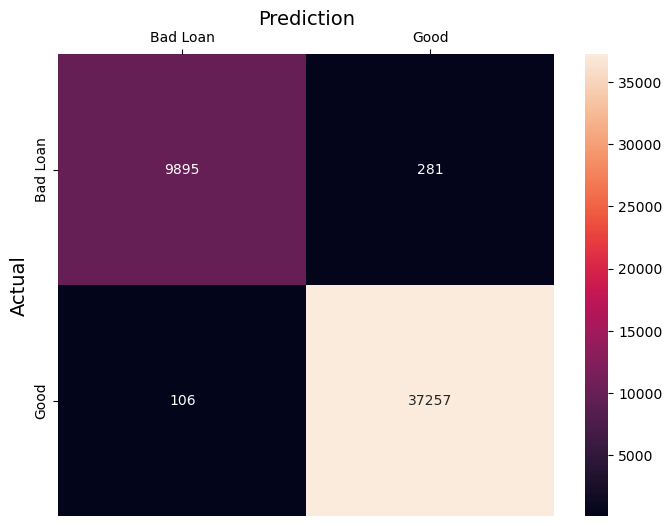

In [60]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred_hype)

fig, ax = plt.subplots(figsize = (8,6))
sns.heatmap(confusion_matrix(y_true = y_test, y_pred = y_pred_hype), fmt = 'g', annot = True)
ax.xaxis.set_label_position('top')
ax.xaxis.set_ticks_position('top')
ax.set_xlabel('Prediction', fontsize = 14)
ax.set_xticklabels(['Bad Loan','Good'])
ax.set_ylabel('Actual', fontsize = 14)
ax.set_yticklabels(['Bad Loan','Good'])
plt.show()